<a href="https://colab.research.google.com/github/moneypitak/multivariate/blob/main/Final_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ

1.ข้อมูลโจทย์ อยู่ใน ตัวแปร Data

2.ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 
2 มิติ

4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

5.เขียน comments อธิบายทุกขั้นตอน

6.อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist

7.commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [124]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [125]:

Name = 'นายมันนี่ พิทักษ์'
ID = '623020532-3'

In [126]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [127]:
Data = DataGenerator(Name,ID)

020:30:17


In [128]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.158735,5.690950,4.721809,6.845420,-8.818586,8.674218,9.817295,-3.479546,4.282967,-0.384355,-0.777516,3.675601,8.829940,6.405371,9.966592,3.992198,-8.064268,6.985899,-3.773405,4.839581,8.553680,-0.406223,6.176259,9.658190,9.726215,-4.928476,-5.672280,-6.643199,0.836293,7.008406,11.381901,37.042030
1,0.237897,-8.708843,4.091957,3.514153,6.757265,-0.806308,-1.606048,-3.883340,0.978578,-9.646735,4.007047,8.824369,6.750778,8.379198,-0.776645,4.366767,1.098278,2.232916,-4.627907,0.760617,-9.299746,4.265117,-3.998633,-6.232224,-1.240039,-6.886413,9.749203,-4.989181,-7.989723,-10.218368,-17.417686,-49.091842
2,4.866806,8.418990,6.767935,-4.984544,-5.275355,-6.295832,9.327885,2.584479,7.280811,-9.761366,6.611680,-8.269010,-9.359300,-10.273204,-5.067568,-3.883400,10.641632,7.974038,0.926677,6.703359,-10.701040,6.126352,-7.227058,-5.668466,7.041791,-4.571509,6.746427,0.297157,2.435627,3.658404,16.837979,20.292018
3,-1.136705,-2.714385,-2.648603,4.901242,4.248367,9.549578,2.664071,-1.139723,-9.963553,0.056283,-0.660017,-5.262655,5.093533,8.513628,1.656745,0.155172,3.220070,9.470969,6.852573,5.513243,-5.219937,-3.391028,8.758440,-0.903553,-0.506274,3.940649,3.097257,5.860868,0.052261,8.228941,-5.428770,43.144703
4,-1.028214,5.195002,-3.857438,-2.639887,6.097272,-8.246678,-5.101791,-7.036203,-5.091693,2.806334,-6.786280,-0.792682,1.195364,-2.886659,-4.176513,2.327837,5.258050,-1.951416,-10.641730,7.965830,7.361706,-4.149267,3.340338,-2.176383,4.450684,-8.114877,-7.508209,11.146235,7.814902,-4.331333,10.390004,-19.656667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.209858,-2.107553,-4.876959,10.332166,0.019237,4.050258,-7.719833,5.508394,3.089267,5.008145,6.739258,5.463149,-1.630533,7.428161,-10.264293,7.334081,5.689646,-0.106500,2.801250,10.591213,-1.641509,-0.452060,-0.190323,5.139647,-9.441470,-8.238742,-8.528449,7.575231,-3.882827,2.627791,-4.215105,15.138955
9996,0.820607,3.711509,-4.954779,-3.238819,5.206296,-8.180974,-4.673332,-6.915658,-4.080469,3.522967,-8.631682,-1.238047,2.032672,-0.882564,-3.215082,3.016409,7.209913,-1.716118,-9.207724,8.560131,6.654362,-3.806772,4.960512,0.399443,4.292408,-9.222095,-9.273189,10.454157,7.079641,-7.743286,7.423018,-36.716428
9997,-10.583808,4.730278,-1.744426,-9.567553,-4.061406,7.446723,-5.974800,-7.825554,-4.524337,9.447843,3.253149,1.498652,1.186343,6.623139,-0.089589,3.669097,5.374887,8.916595,-9.863856,-5.804452,4.260478,3.077116,-4.209442,3.385056,2.103282,-5.786865,5.315729,-6.066785,8.830470,-11.027183,9.460556,-53.135914
9998,1.642318,2.744377,2.768039,7.493199,-3.545052,-9.842654,7.303738,6.927084,-0.353955,7.699033,-2.400825,8.442161,3.262577,1.571756,10.392827,9.759724,8.022491,-3.123120,-10.138046,9.233163,-8.774336,-3.707826,-3.129864,9.677015,-7.495096,-4.406123,-1.974531,-7.448938,1.370353,-8.520655,5.488755,-40.603276


ข้อมูลที่ได้มามี 10000 แถวและ 32 คอลัมน์

In [129]:
Data.shape

(10000, 32)

ดูขนาดของ Correlation coeficient จากข้อมูล

In [130]:
corr = np.corrcoef(Data.to_numpy().T)
corr.shape

(32, 32)

ทำการวนลูปหาค่าสัมประสิทธิ์ความสัมพันธ์ (Correlation)ที่ซ้ำกัดเพื่อขจัดข้อมูลนั้นออกไป

In [131]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 29 column = 31 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


In [132]:
new_data = Data.iloc[:,1:30]
new_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,5.690950,4.721809,6.845420,-8.818586,8.674218,9.817295,-3.479546,4.282967,-0.384355,-0.777516,3.675601,8.829940,6.405371,9.966592,3.992198,-8.064268,6.985899,-3.773405,4.839581,8.553680,-0.406223,6.176259,9.658190,9.726215,-4.928476,-5.672280,-6.643199,0.836293,7.008406
1,-8.708843,4.091957,3.514153,6.757265,-0.806308,-1.606048,-3.883340,0.978578,-9.646735,4.007047,8.824369,6.750778,8.379198,-0.776645,4.366767,1.098278,2.232916,-4.627907,0.760617,-9.299746,4.265117,-3.998633,-6.232224,-1.240039,-6.886413,9.749203,-4.989181,-7.989723,-10.218368
2,8.418990,6.767935,-4.984544,-5.275355,-6.295832,9.327885,2.584479,7.280811,-9.761366,6.611680,-8.269010,-9.359300,-10.273204,-5.067568,-3.883400,10.641632,7.974038,0.926677,6.703359,-10.701040,6.126352,-7.227058,-5.668466,7.041791,-4.571509,6.746427,0.297157,2.435627,3.658404
3,-2.714385,-2.648603,4.901242,4.248367,9.549578,2.664071,-1.139723,-9.963553,0.056283,-0.660017,-5.262655,5.093533,8.513628,1.656745,0.155172,3.220070,9.470969,6.852573,5.513243,-5.219937,-3.391028,8.758440,-0.903553,-0.506274,3.940649,3.097257,5.860868,0.052261,8.228941
4,5.195002,-3.857438,-2.639887,6.097272,-8.246678,-5.101791,-7.036203,-5.091693,2.806334,-6.786280,-0.792682,1.195364,-2.886659,-4.176513,2.327837,5.258050,-1.951416,-10.641730,7.965830,7.361706,-4.149267,3.340338,-2.176383,4.450684,-8.114877,-7.508209,11.146235,7.814902,-4.331333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.107553,-4.876959,10.332166,0.019237,4.050258,-7.719833,5.508394,3.089267,5.008145,6.739258,5.463149,-1.630533,7.428161,-10.264293,7.334081,5.689646,-0.106500,2.801250,10.591213,-1.641509,-0.452060,-0.190323,5.139647,-9.441470,-8.238742,-8.528449,7.575231,-3.882827,2.627791
9996,3.711509,-4.954779,-3.238819,5.206296,-8.180974,-4.673332,-6.915658,-4.080469,3.522967,-8.631682,-1.238047,2.032672,-0.882564,-3.215082,3.016409,7.209913,-1.716118,-9.207724,8.560131,6.654362,-3.806772,4.960512,0.399443,4.292408,-9.222095,-9.273189,10.454157,7.079641,-7.743286
9997,4.730278,-1.744426,-9.567553,-4.061406,7.446723,-5.974800,-7.825554,-4.524337,9.447843,3.253149,1.498652,1.186343,6.623139,-0.089589,3.669097,5.374887,8.916595,-9.863856,-5.804452,4.260478,3.077116,-4.209442,3.385056,2.103282,-5.786865,5.315729,-6.066785,8.830470,-11.027183
9998,2.744377,2.768039,7.493199,-3.545052,-9.842654,7.303738,6.927084,-0.353955,7.699033,-2.400825,8.442161,3.262577,1.571756,10.392827,9.759724,8.022491,-3.123120,-10.138046,9.233163,-8.774336,-3.707826,-3.129864,9.677015,-7.495096,-4.406123,-1.974531,-7.448938,1.370353,-8.520655


import


In [133]:

from sklearn.cluster import KMeans

Define

In [134]:
kmeans = KMeans(n_clusters=8, random_state=2021)

เริ่มทำการคำนวณ

In [135]:
kmeans.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

แสดง จุด cluster centers ที่คำนวณออกมาได้

In [136]:
kmeans.cluster_centers_

array([[ 6.88587776e+00,  7.17865897e+00,  6.32258722e+00,
        -9.05504787e+00,  5.80221119e+00,  3.31059524e+00,
        -2.63445280e+00,  4.33167159e+00, -3.86624225e+00,
        -2.62959838e+00,  3.98340654e+00,  7.09716845e+00,
         7.07468567e+00,  7.31355219e+00, -3.26841996e+00,
        -8.13537577e+00,  6.24076867e+00, -3.99548429e+00,
        -1.09431515e+00,  7.67136382e+00,  4.53433853e+00,
         4.16435817e+00,  1.75787357e+00,  7.68140907e+00,
        -2.09197786e+00, -1.15931194e+00,  5.79773017e-01,
        -7.37432435e-01,  3.68755189e+00],
       [-1.09516775e+00, -5.39084335e+00, -3.37696274e+00,
         5.82951052e+00,  4.69044851e+00,  4.22899302e+00,
         8.20194567e-01, -1.92899927e+00, -1.59090025e+00,
         2.76424497e+00, -3.84254352e-01,  1.14929818e-01,
         5.25857180e-01,  1.32585339e+00,  3.94743306e+00,
        -2.75772708e+00,  2.84889478e+00,  4.77776748e+00,
        -3.12725677e+00, -1.02603302e+00, -7.10612094e-01,
         6.24

ทดสอบการจัดกลุ่มของ Data

In [137]:
km = kmeans.predict(new_data)
km

array([0, 2, 3, ..., 6, 4, 1], dtype=int32)

ทำ PCA ลด DN


In [138]:

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA(n_components=2)
new_pca = pca.fit_transform(new_data)

In [143]:
matplotlib.rcParams['figure.figsize']=[5,5]

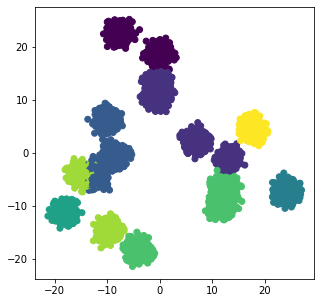

In [144]:
kmeans = KMeans(n_clusters=8, random_state=2021)
kmeans.fit(new_data)
y = kmeans.predict(new_data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

จากนั้นทำการหาจำนวนกลุ่มที่เหมาะสมต่อการแบ่งกลุ่มโดยการหาค่า k ที่เหมาะสมของข้อมูลด้วยวิธี The Elbow Method

ทำการหาค่า SSE (Sum of Squared error) ของข้อมูล

วิธีการหาค่า k ด้วยวิธี The elbow method

In [145]:
kmeans.inertia_  #ค่าของ SSE Sum of Squared error

4076534.514372877

In [155]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    m = kmeans.fit(new_data)
    SSE.append(kmeans.inertia_)

In [156]:
SSE

[9967039.355089583,
 8688726.566733709,
 7802210.613899883,
 6823585.4253423065,
 6055532.652808431,
 5436631.432854717,
 4665134.174692608,
 4076534.514372877]

In [157]:
matplotlib.rcParams['figure.figsize']=[5,5]

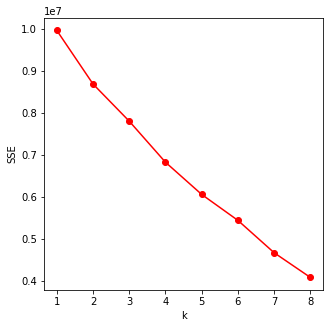

In [158]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-r')
plt.xlabel('k')
plt.ylabel('SSE');

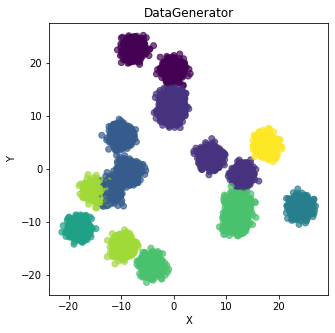

In [160]:
kmeans = KMeans(n_clusters = 8,random_state=2021)
kmeans.fit(new_data)
km = kmeans.predict(new_data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=t,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากกราฟ หลังจากที่ได้ทำการจัดกลุ่ม k เท่ากับ 8 กลุ่ม

3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

จากกราฟข้างต้น เนื่องจากมีการทับซ้อนของข้อมูล ดังนั้นจะเป็ฯการลด Dimension

*วิธี MDS*

Import

In [161]:
from sklearn.manifold import MDS

Define

In [162]:
mds = MDS(n_components=2)

fit transform


In [164]:
new_mds = mds.fit_transform(new_data)

ทำการจัดกลุ่มจากการวัดระยะห่างในการจัดกลุ่ม ระหว่างจุดข้อมูล

In [166]:
kmeans_23 = KMeans(n_clusters=8,random_state=2021)
kmeans_23.fit(new_data)
g = kmeans_23.predict(new_data)

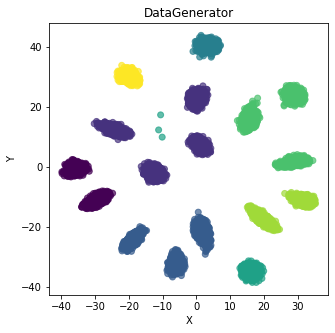

In [167]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

# เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

กราฟที่ 1 กราฟ PCA

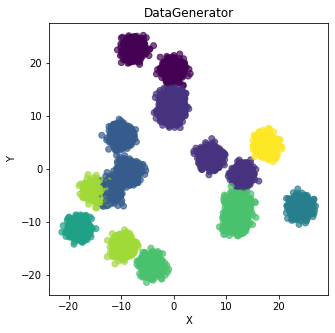

In [168]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=t,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');


กราฟที่ 2 กราฟ MDS

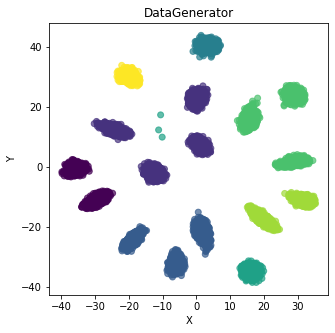

In [169]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากการเปรียบเทียบกราฟที่ 1 กราฟ PCA และ กราฟที่ 2 กราฟ MDS จะเห็นการกระจายของข้อมูลที่แตกต่างกันส่วนกราฟที่ 1 ข้อมูลส่วนมากไม่มีการกระจายของข้อมูล